# **Decoding Data Jobs**
##### **using Statistical Analysis, Natural Language Processing, and Classification**
<p align ="right">Zacharia Schmitz <br>
Joshua Click<br>
November 2023

---


##
### Rate Limits & Ethics:



Scraping

UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE 
UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE 
UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE 
UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE UPDATE 

[**Update for Google Search scraping**](https://docs.github.com/en/github/site-policy/github-acceptable-use-policies)

>"Update for Google Search scraping.

<b><u>*Required Libraries*</u></b>

1. **numpy:**<br>
    - The fundamental package for scientific computing with Python.<br><br>

2. **pandas:**<br>
    - An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools.<br><br>

3. **matplotlib:**<br>
    - A plotting library for the Python programming language and its numerical mathematics extension NumPy.<br><br>

4. **seaborn:**<br>
    - A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>

5. **nltk:**<br>
    - Natural Language Toolkit, is a library for symbolic and statistical natural language processing for English written in the Python programming language.<br><br>

6. **ipywidgets**:<br> 
    - IPython widgets for interactive data visualization and manipulation.<br><br>

7. **IPython.display**:<br> 
    - Public API for display tools in IPython.<br><br>

8. **plotly.express:**<br> 
    - A terse, consistent, high-level API for rapid data exploration and figure generation.<br><br>

9. **sklearn:**
    - .*pipeline*<br><br>
        - Provides utilities to build a composite estimator, as a chain of transforms and estimators.<br><br>
    - .*model_selection*<br><br>
        - Is a module which includes classes and functions for model selection.<br><br>
    - .*feature_extraction.text*<br><br>
        - Provides classes and functions for text classification.<br><br>
    - .*linear_model*<br><br>
        - Provides functions for fitting linear models.<br><br>
    - .*metrics*<br><br>
        - Includes score functions, performance metrics and pairwise metrics and distance computations.<br><br>

<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

---

### Initial Hypotheses

1. Hypothesis

2. Hypothesis

3. Hypothesis

4. Hypothesis

5. Hypothesis

6. Hypothesis

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

---

In [1]:
import pandas as pd
import wrangle as w
from wrangle import keywords, keywords_programming, keywords_ML_Algorithms, keywords_analyst_tools, keywords_cloud_tools

### Acquisition



- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings.

### The Dataset

Due to time constraints on the project and the value added when using a large dataset, we searched for a public dataset.

- We acquired the data from a Kaggle dataset that has been scraping "Data Analyst" job postings for the past year. The dataset has 33,000 entries as of 1 November 2023.

#### CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

In [2]:
# Read in job_scrapes
jobs_df = pd.read_csv("../support_files/working_docs/jobs.csv")

| Field Name | Description |
| --- | --- |
| `Unnamed: 0` | Appears to be an auto-incremented identifier. |
| `index` | Another identifier, possibly redundant with "Unnamed: 0". |
| `title` | Job title. |
| `company_name` | Name of the company offering the job. |
| `location` | Location of the job. |
| `via` | Source/platform where the job was posted. |
| `description` | Detailed description of the job. |
| `extensions` | Additional information about the job (e.g., job type, benefits). |
| `job_id` | A unique identifier for the job, possibly encoded. |
| `thumbnail` | URL to a thumbnail image associated with the job/company. |
| `url` | URL for the job posting. |
| `company_description` | Description of the company. |
| `company_rating` | Company's rating. |
| `rating_count` | Number of ratings the company received. |
| `job_type` | Type of the job (e.g., full-time, part-time). |
| `benefits` | List of benefits provided by the company. |
| `posted` | When the job was posted. |
| `deadline` | Application deadline for the job. |
| `employment_type` | Employment type (e.g., full-time, contract). |
| `commute_time` | Information on commute time, if available. |
| `salary_pay` | Salary payment value, if available. |
| `salary_rate` | Salary rate (e.g., per hour, per year), if available. |
| `salary_avg` | Average salary for the job, if available. |
| `salary_min` | Minimum salary for the job, if available. |
| `salary_max` | Maximum salary for the job, if available. |
| `salary_hourly` | Hourly salary, if available. |
| `salary_yearly` | Yearly salary, if available. |
| `salary_standardized` | Standardized salary information, if available. |
| `description_tokens` | List of skills extracted from the job description. |

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

--- 

The dataset had some columns that were engineered since the scraping. Due to us wanting reproducability for our own scraped data, we did not use any of the engineered columns from the dataset, and developed our own. We also dropped columns that we do not intend to use.

From the original dataset, we dropped:

In [3]:
jobs_df_cleaned = w.prepare_jobs(jobs_df, cache=False, read_csv=True)

### Drop Columns
*Looking to reduce dimensionality of the dataset*

- Our dataset came with some extra index columns that we dropped

    - `Unnamed: 0`
    - `index`

- These were just columns we didn't see a use for and wanted to reduce dimensionality

    - `extensions` - *Google defined tokens for the posting oftentimes benefits packages. Maybe later.*
    - `thumbnail` - *The companies thumbnail*
    - `search_term` - *All are "Data Analyst"*
    - `search_location` - *All are "United States"*
    - `commute_time` - *All nulls*

- Although our dataset came with the following columns, we wanted to be able to reproduce on unseen data, so we created functions to create these ourselves:

    - `salary_avg`
    - `salary_min`
    - `salary_max`
    - `salary_hourly`
    - `salary_yearly`
    - `salary_standardized`
    - `description_tokens`

### Check for Duplicates

*`job_id` was the only unique column per job posting, turned out to be 20 duplicate posts from scraping*

### Handling Missing Data
*Some columns had nulls. They aren't a big deal for analysis and we won't use those for modeling anyway.*

The only assumptions we imputed to the data was `work_from_home`. 

- This had 55% nulls, and the rest was True.
- We imputed the remaining 45% as False.


`salary` had 82% missing, so most of our jobs don't have the salary included. We decided that was fine and what we had, could still provide insights.

`schedule_type` had minimal nulls, but in the end we only worked with "Full-time" positions anyway. Full-time was 72% of the original dataset.

#### Work From Home

`work_from_home` had 55% nulls and the remaining 45% was True. We assumed the remaining 45% was False.

### Feature Engineering - Standardizing Salary
*original dataframe had some weird metrics, and we wanted/needed to do it ourselves for reproducability*

- With the scraped `salary` column they all were not formatted the same. Some examples are:

    - "77K-116K a year"
    - "40-75 an hour"
    - "165K a year"
    - "53 an hour"
    - "4.6K-6K a month"

- From this column, we engineered:

    - `pay_rate` - hourly, monthly, or annually
    - `cleaned_salary` - salary stripped to numbers only

- For the following, we annualized all of the salaries (hourly * 2080, monthly * 12)

    - `min_salary` - lower end of the salary range provided *(or the only digit provided)*
    - `max_salary` - upper end of the salary range provided *(or the only digit provided)*
    - `avg_salary` - average salary between the two ranges *(or the only digit provided)*

### Standardize Location Column
*`location` had 0.07% nulls. We won't drop those, as they will still provide information for non-location based analytics.*

*Some postings had cities in the dataset. We won't be narrowing down that much, so we broadened each posting to the state level, if applicable.*

Our dataset only had the following locations:

| Location             | Percentage |
|----------------------|------------|
| United States        | 33%        |
| Anywhere             | 29%        |
| Missouri             | 14%        |
| Oklahoma             | 8%         |
| Kansas               | 7%         |
| Arkansas             | 6%         |
| California           | 0.4%       |
| Multiple Locations   | 0.17%      |
| Texas                | 0.14%      |
| Unknown              | 0.09%      |
| Nebraska             | 0.04%      |
| Massachusetts        | 0.04%      |
| New York             | 0.03%      |
| Pennsylvania         | 0.02%      |
| District of Columbia | 0.01%      |
| New Jersey           | 0.004%     |
| Connecticut          | 0.004%     |

### Date Formatting
*feature engineered a `posting_created` column*

Our dataframe had `date_time`, which was the date and time that the data was scraped, we converted this to date_time type and renamed to `date_scraped`

We also had a `posted_at`, fromatted as "X hours ago", which was when the posting was created. We made this a timedelta type.

With both of those columns, we created `posting_created`, by subtracting timedelta, from the date_time.

### Standardize Job Title

`title` originally had 13,157 different values in the dataset. We standardized these into `title_cleaned` by:
- Data Scientist - titles containing "scie"
- Data Engineer - titles containing "eng"
- Data Analyst - titles containing "ana"
- Other - if it didn't fit any of these

We left Other in the dataframe, since it still provided value with data job descriptions. We did not include it in our model predictions, since there was no value in predicting it.

Some examples of "Other" titles were:
- "Trillium Data Quality"
- "Systematic review"
- "GA4 full setup + Conversion and Pixel API setup"

### Job Description NLP Processing

`description` was the job description in it's scraped format.

We made `description_cleaned`, which was a tokenized, normalized, and lemmatized version of `description`

From `description_cleaned`, we pulled out categories of keywords related to data jobs. The categories we looked at were:
- programming languages
- machine learning algorithms
- visualization tools
- big data tools
- cloud tools
- business intelligence

With the words we defined from these categories, we created `description_tokens`.

#### Creation of `description_cleaned`
*We used `punkt` (for sentence tokenization) and standard `stopwords` for tokenizing, normalizing, and lemmatizing*

#### Define Keywords for `description_tokenized`

*We selected some keywords that identify into certain data categories. Then we checked the description for single occurences of these words and assigned it to `description_tokens`*

| Analyst Tools       | Programming Languages | Business Intelligence | Big Data           | ML Algorithms                                | Visualization Tools       | Cloud Tools   | Computer Vision & NLP        |
|---------------------|-----------------------|-----------------------|--------------------|---------------------------------------------|---------------------------|---------------|------------------------------|
| excel               | sql                   | tableau               | mysql              | regression                                  | matplotlib                | aws           | computer vision             |
| tableau             | python                | power bi              | postgresql         | clustering                                  | seaborn                   | azure         | natural language processing |
| word                | r                     | power_bi              | microsoft sql      | classification                              | plotly                    | gcp           |                              |
| powerpoint          | c                     | google data studio    | sqlite             | predictive                                  | ggplot                    | snowflake     |                              |
| looker              | c#                    | quicksight            | mongodb            | prediction                                  | shiny                     | redshift      |                              |
| powerbi             | javascript            | qlik sense            | bigquery           | decision trees                              | geoplotlib                | bigquery      |                              |
| outlook             | js                    | azure synapse         | oracle database    | random forests                              | bokeh                     | aurora        |                              |
| azure               | java                  | looker                | azure sql          | cnn                                         | d3 js                     | amazon        |                              |
| jira                | scala                 | alteryx               | amazon rds         | gradient boosting                           | leaflet / folium          | ec2           |                              |
| twilio              | sas                   | sap analytics cloud   | google cloud sql   | bayesian approaches                         | pygal                     | s3            |                              |
| snowflake           | matlab                | tibco spotfire        | snowflake          | dense neural networks                       | altair                    |               |                              |
| shell               | c++                   | domo                  |                    | mlp                                         | dygraphs                  |               |                              |
| linux               | c/c++                 | sisense               |                    | rnn                                         | highcharter               |               |                              |
| sas                 | perl                  | thoughtspot           |                    | transformer networks                        | tableau                   |               |                              |
| sharepoint          | go                    |                       |                    | bert                                        | microsoft power bi        |               |                              |
| mysql               | typescript            |                       |                    | gpt-3                                       | google data studio        |               |                              |
| visio               | bash                  |                       |                    | graph neural networks                       | amazon quicksight         |               |                              |
| git                 | html                  |                       |                    | autoencoder networks                        | qlik sense                |               |                              |
| mssql               | css                   |                       |                    | dae                                         | azure synapse             |               |                              |
| powerpoints         | php                   |                       |                    | vae                                         | looker                    |               |                              |
| postgresql          | powershell            |                       |                    | gan                                         | alteryx                   |               |                              |
| spreadsheets        | rust                  |                       |                    | evolutionary approaches                     | sap analytics cloud       |               |                              |
| seaborn             | kotlin                |                       |                    |                                             | tibco spotfire            |               |                              |
| pandas              | ruby                  |                       |                    |                                             | domo                      |               |                              |
| gdpr                | dart                  |                       |                    |                                             | sisense                   |               |                              |
| spreadsheet         | assembly              |                       |                    |                                             | thoughtspot               |               |                              |
| alteryx             | swift                 |                       |                    |                                             |                           |               |                              |
| github              | vba                   |                       |                    |                                             |                           |               |                              |
| postgres            | lua                   |                       |                    |                                             |                           |               |                              |
| ssis                | groovy                |                       |                    |                                             |                           |               |                              |
| numpy               | delphi                |                       |                    |                                             |                           |               |                              |
| power_bi            | objective-c           |                       |                    |                                             |                           |               |                              |
| spss                | haskell               |                       |                    |                                             |                           |               |                              |
| ssrs                | elixir                |                       |                    |                                             |                           |               |                              |
| microstrategy       | julia                 |                       |                    |                                             |                           |               |                              |
| cognos              | clojure               |                       |                    |                                             |                           |               |                              |
| dax                 | solidity              |                       |                    |                                             |                           |               |                              |
| matplotlib          | lisp                  |                       |                    |                                             |                           |               |                              |
| dplyr               | f#                    |                       |                    |                                             |                           |               |                              |
| tidyr               | fortran               |                       |                    |                                             |                           |               |                              |
| ggplot2             | erlang                |                       |                    |                                             |                           |               |                              |
| plotly              | apl                   |                       |                    |                                             |                           |               |                              |
| esquisse            | cobol                 |                       |                    |                                             |                           |               |                              |
| rshiny              | ocaml                 |                       |                    |                                             |                           |               |                              |
| mlr                 | crystal               |                       |                    |                                             |                           |               |                              |
| docker              | javascript/typescript |                       |                    |                                             |                           |               |                              |
| linux               | golang                |                       |                    |                                             |                           |               |                              |
| jira                | nosql                 |                       |                    |                                             |                           |               |                              |
| hadoop              | mongodb               |                       |                    |                                             |                           |               |                              |
| airflow             | t-sql                 |                       |                    |                                             |                           |               |                              |
| redis               | no-sql                |                       |                    |                                             |                           |               |                              |
| graphql             | visual_basic          |                       |                    |                                             |                           |               |                              |
| sap                 | pascal                |                       |                    |                                             |                           |               |                              |
| tensorflow          | mongo                 |                       |                    |                                             |                           |               |                              |
| node                | pl/sql                |                       |                    |                                             |                           |               |                              |
| asp.net             | sass                  |                       |                    |                                             |                           |               |                              |
| unix                | vb.net                |                       |                    |                                             |                           |               |                              |
| jquery              | mssql                 |                       |                    |                                             |                           |               |                              |
| pyspark             |                       |                       |                    |                                             |                           |               |                              |
| pytorch             |                       |                       |                    |                                             |                           |               |                              |
| gitlab              |                       |                       |                    |                                             |                           |               |                              |
| selenium            |                       |                       |                    |                                             |                           |               |                              |
| splunk              |                       |                       |                    |                                             |                           |               |                              |
| bitbucket           |                       |                       |                    |                                             |                           |               |                              |
| qlik                |                       |                       |                    |                                             |                           |               |                              |
| terminal            |                       |                       |                    |                                             |                           |               |                              |
| atlassian           |                       |                       |                    |                                             |                           |               |                              |
| unix/linux          |                       |                       |                    |                                             |                           |               |                              |
| linux/unix          |                       |                       |                    |                                             |                           |               |                              |
| ubuntu              |                       |                       |                    |                                             |                           |               |                              |
| nuix                |                       |                       |                    |                                             |                           |               |                              |
| datarobot           |                       |                       |                    |                                             |                           |               |                              |


### Schedule Types

`schedule_type` contained many different values, and comparing freelance work to full-time, wasn't accurate and skewed the metrics.

During exploration it was identified that contract (typically freelance) positions tend to pay a lot more than full time.
- Some of these positions were offering up to $750 an hour
- This caused issues when we annualized the pay (multiplied by 2080 for hourly)

Freelance work is typically not something for entry level positions, so for now we will only look into full-time positions.

### Check out the final dataframe

In [4]:
w.check_columns(jobs_df_cleaned)

Total rows: 19735
Total columns: 21


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,datetime64[ns],6458,0,0.00000,"DatetimeIndex(['2023-01-14 08:00:00', '2023-02...","(2022-11-03, 2023-11-02)"
1,title,object,6557,0,0.00000,"[Data Analyst, 071352-Data Analyst Lead - ML O...",None
2,company_name,object,6374,0,0.00000,"[I.T. Solutions, Capgemini, EDWARD JONES, Cali...",None
3,location,object,579,20,0.00101,"[United States, Jamestown, MO, United States...",None
4,via,object,459,8,0.00041,"[via Trabajo.org, via Jora, via WJHL Jobs, via...",None
5,description,object,13772,0,0.00000,"[Role: Data Analyst\nLocation: Foster City, CA...",None
6,posted_at,object,49,0,0.00000,"[0 days 20:00:00, 0 days 05:00:00, 0 days 14:0...",None
7,schedule_type,object,1,0,0.00000,[Full-time],None
8,work_from_home,bool,2,0,0.00000,"[False, True]","(False, True, 0.29196858373448187)"
9,date_scraped,object,3460,0,0.00000,"[2023-01-15 04:00:38.277339, 2023-02-25 04:00:...",None


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>
---

### Questions

1. Most Common Words in READMEs

2. README Length by Programming Language

3. Number of Unique Words by Programming Language

4. Words Uniquely Identifying a Programming Language

5. Further Exploration

### Train, Validate, & Test Splits

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (Our validate will be generated during GridSearch)
train, test = train_test_split(
    jobs_df_cleaned, train_size=0.8, test_size=0.2, random_state=321
)

# Print sizes, length of set and ratio of total
print(f"Train size: {len(train)} ({len(train) / len(jobs_df_cleaned):.2%})")
print(f"Test size: {len(test)} ({len(test) / len(jobs_df_cleaned):.2%})")

Train size: 15788 (80.00%)
Test size: 3947 (20.00%)


In [6]:
# Retain variable
jobs_df_cleaned = train.copy()

### What companies have the most job postings?

What the function does

company_name
Walmart                             769
Talentify.io                        488
EDWARD JONES                        475
Corporate                           372
Cox Communications                  335
Centene Corporation                 121
Insight Global                      114
Staffigo Technical Services, LLC    109
Dice                                 92
Jobot                                68
Name: count, dtype: int64

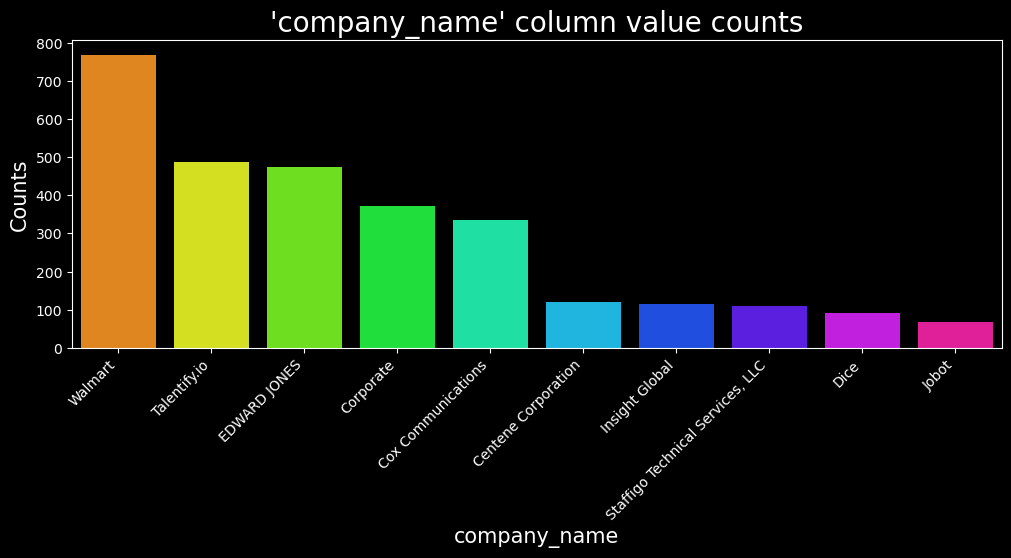

In [7]:
w.eda_plot(jobs_df_cleaned, "company_name", topn=10)

Summary

### What is the location spread for our dataset?

What the function does

location_cleaned
United States         5277
Anywhere              4584
Missouri              2263
Oklahoma              1298
Kansas                1153
Arkansas              1062
California              59
Multiple Locations      28
Name: count, dtype: int64

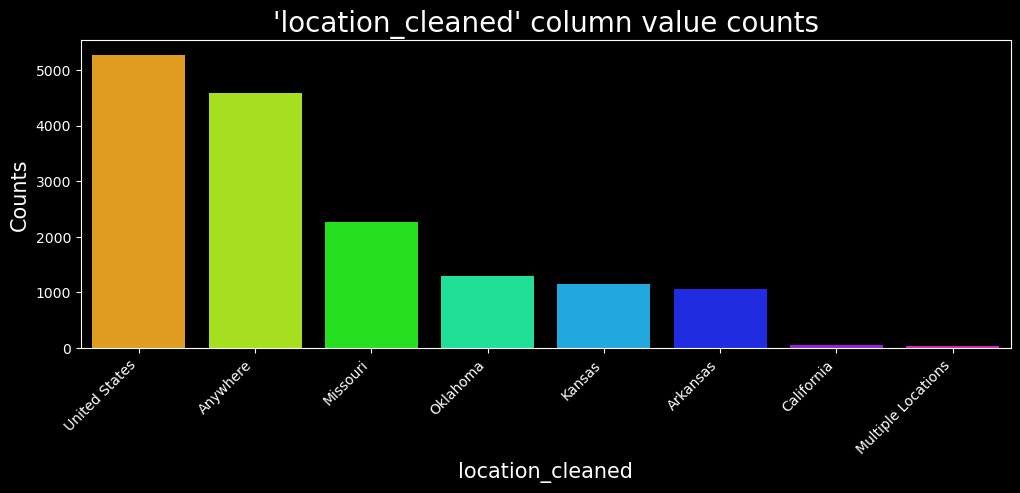

In [8]:
w.eda_plot(jobs_df_cleaned, "location_cleaned", topn=8)

### Within the Google Jobs search, which site has the most postings?

What the function does

via
via LinkedIn        5295
via BeBee           2064
via Trabajo.org     1701
via ZipRecruiter    1258
via Indeed           792
Name: count, dtype: int64

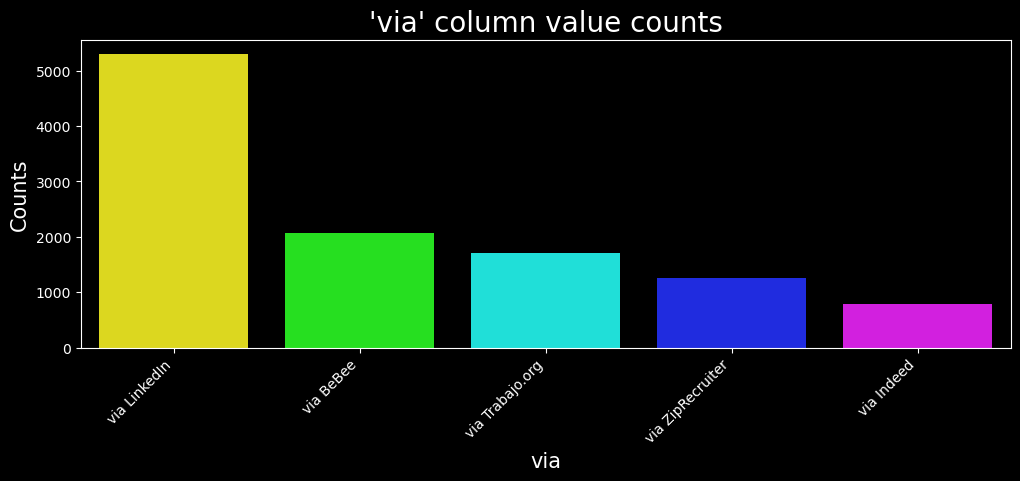

In [9]:
w.eda_plot(jobs_df_cleaned, "via", topn=5)

### What words are most common in data job descriptions?

What the function does

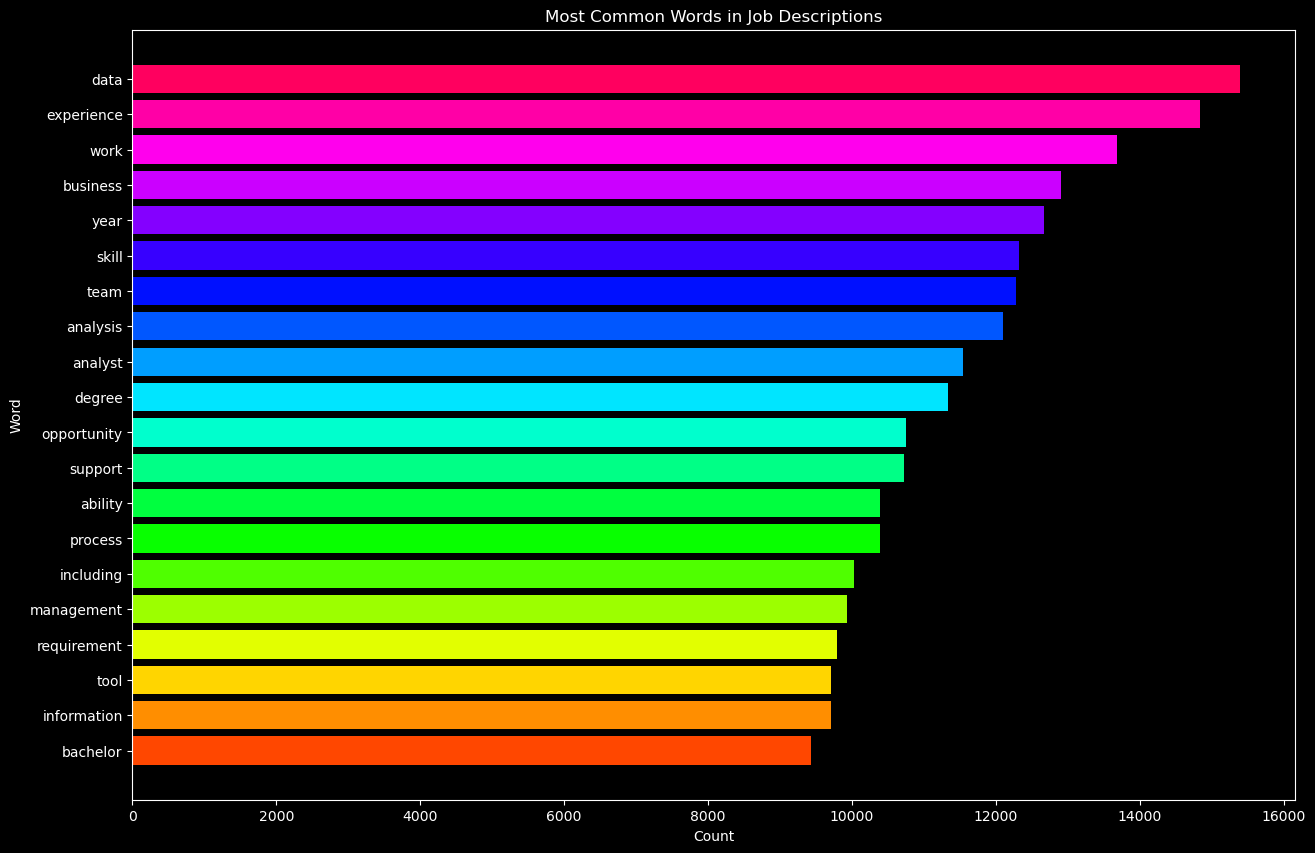

In [10]:
w.plot_most_common_words(jobs_df_cleaned, "description_cleaned", 20)

### Do a majority of places allow work from home or want you in the work place?
<i> Remember this is full time only </i>

What the function does

work_from_home
False    11204
True      4584
Name: count, dtype: int64

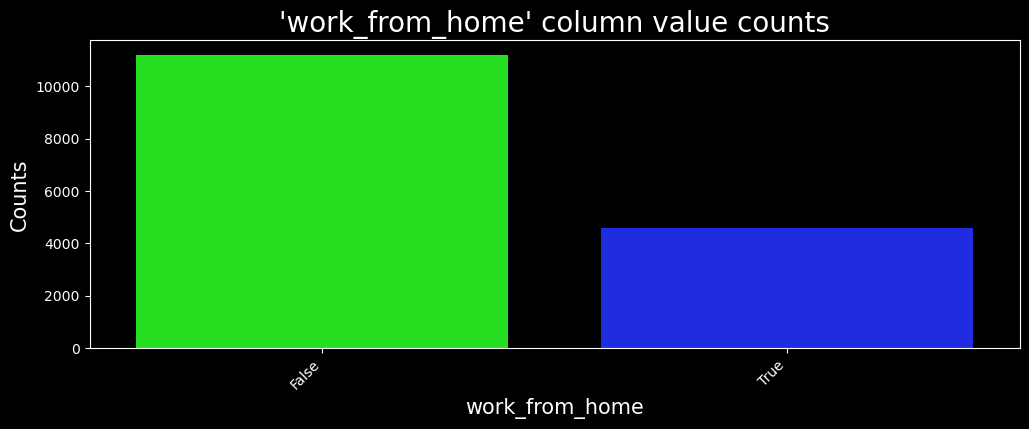

In [11]:
w.eda_plot(jobs_df_cleaned, "work_from_home", topn=2)

### What are the overall top things to learn for data jobs?

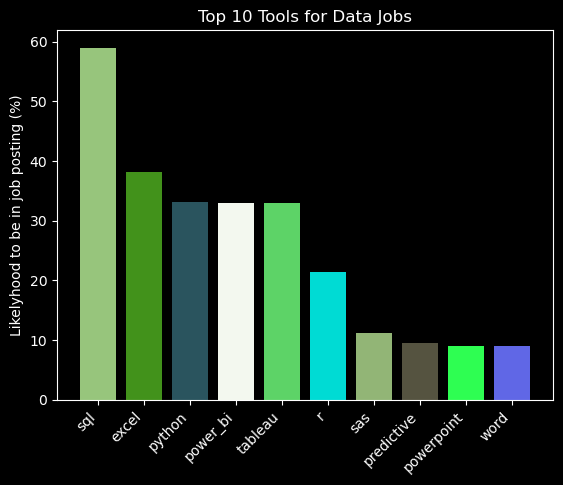

In [12]:
w.filtered_keywords(jobs_df_cleaned, keywords, title="Tools", head=10)

### What are the most common programming languages in data jobs?

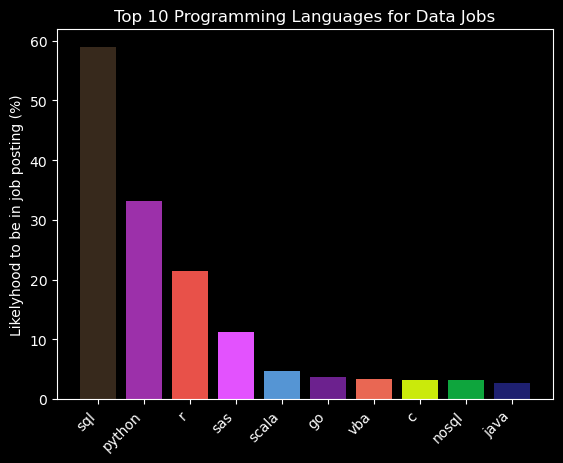

In [13]:
w.filtered_keywords(jobs_df_cleaned, keywords_programming, title="Programming Languages", head=10)

Summary

### What are the most common Machine Learning principles for data jobs?

What the function does

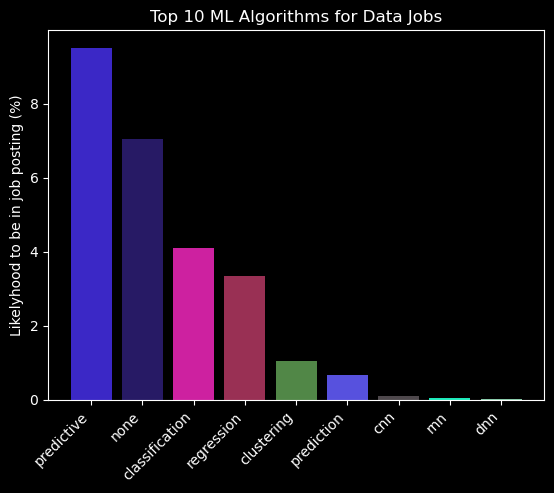

In [14]:
w.filtered_keywords(jobs_df_cleaned, keywords_ML_Algorithms, title="ML Algorithms")

### When do we see most data jobs being posted?

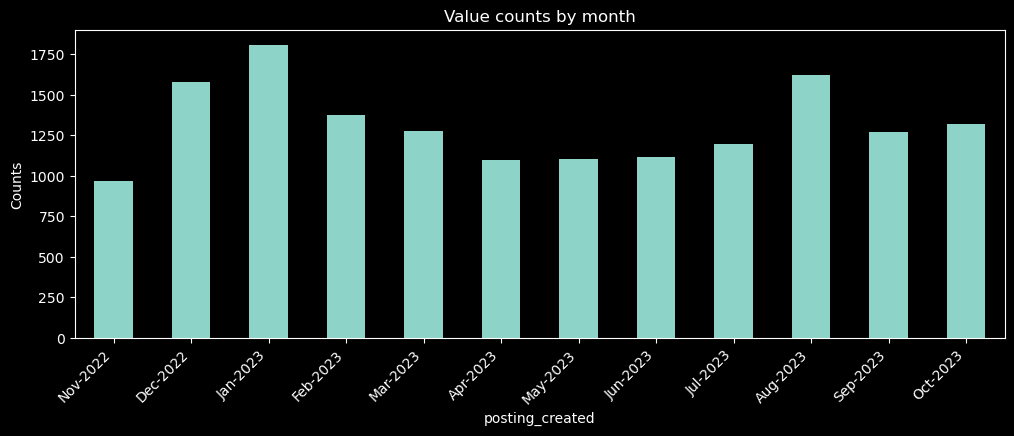

In [15]:
w.plot_monthly_postings(jobs_df_cleaned)

What the function does

### Dataframe Generation for Interactive Plots

In [16]:
# Get the top skills
top_skills_df = w.get_top_skills(jobs_df_cleaned, qty=100)

### What are top skills overall?

In [17]:
w.create_skill_plot(top_skills_df)

Dropdown(description='Skill Category:', options=(('All Skills', ['sql', 'python', 'r', 'c', 'c#', 'javascript'…

IntSlider(value=10, description='Number of Skills:', max=50, min=1)

Button(description='Plot', style=ButtonStyle())

### A deeper look into individual skills

In [18]:
from ipywidgets import widgets

w.create_interactive_salary_plot(jobs_df_cleaned, top_skills_df)

Dropdown(description='Skill:', options=('airflow', 'alteryx', 'amazon', 'asp.net', 'assembly', 'atlassian', 'a…

Button(description='Plot', style=ButtonStyle())

### Job title specific skills

In [20]:
w.create_skill_postings_plot(jobs_df_cleaned)

Button(description='Go Back', style=ButtonStyle())

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>
---

Useful hyperparameters for `TfidfVectorizer`:

- `max_features`: This hyperparameter controls the maximum number of features (i.e., terms) to include in the TF-IDF matrix. Setting this to a smaller value can help reduce the dimensionality of the matrix and improve performance, especially if the dataset is large.

- `min_df` and `max_df`: These hyperparameters control the minimum and maximum document frequency of terms to include in the TF-IDF matrix. Setting `min_df` to a higher value will exclude terms that appear in fewer than `min_df` documents, while setting `max_df` to a lower value will exclude terms that appear in more than `max_df` documents. These can be useful for removing very rare or very common terms that may not be informative.

- `ngram_range`: This hyperparameter controls the range of n-grams to include in the TF-IDF matrix. An n-gram is a contiguous sequence of n words in a document. Setting `ngram_range` to `(1, 1)` will include only unigrams (i.e., single words), while setting it to `(1, 2)` will include both unigrams and bigrams (i.e., pairs of words).

- `stop_words`: This hyperparameter can be set to a list of stop words to exclude from the TF-IDF matrix. Stop words are common words that are unlikely to be informative, such as "the", "and", and "of".

- `tokenizer`: This hyperparameter can be set to a custom tokenizer function to use instead of the default tokenizer. The tokenizer function should take a string as input and return a list of tokens (i.e., words).

These hyperparameters can be tuned to improve the performance of the TF-IDF vectorization for a specific task or dataset.

### Unbalanced Dataset Modeling (Precision Metric)

#### X and Y Splits for Modeling

In [ ]:
# Drop Other
jobs_unbalanced = jobs_df_cleaned[jobs_df_cleaned['title_cleaned'] != 'Other']

In [ ]:
# Make X variatons without target variables
X_train_unbalanced = jobs_unbalanced['description_cleaned']
X_test_unbalanced = test['description_cleaned']

# Make y variables with target variables
y_train_unbalanced = jobs_unbalanced['title_cleaned']
y_test_unbalanced = test['title_cleaned']

print(f'Train Set:')
print(f'X_train size: {len(X_train_unbalanced)}')
print(f'y_train size: {len(y_train_unbalanced)}')

print(f'\nTest Set:')
print(f'X_test size: {len(X_test_unbalanced)}')
print(f'y_test size: {len(y_test_unbalanced)}')

Train Set:
X_train size: 19348
y_train size: 19348

Test Set:
X_test size: 3947
y_test size: 3947


#### Establishing Baseline

In [ ]:
# Value counts for titles in train set
y_train_unbalanced.value_counts(normalize=True)

title_cleaned
Data Analyst      0.923920
Data Scientist    0.045793
Data Engineer     0.030287
Name: proportion, dtype: float64

Baseline is 92%

#### Gridsearch Pipeline for TF-IDF & Logistic Regression (Unbalanced)

In [ ]:
# Convert X sets to be readable by TF-IDF
X_train_unbalanced = X_train_unbalanced.astype(str).str.replace(r"[\[\],'']", '', regex=True)
X_test_unbalanced = X_test_unbalanced.astype(str).str.replace(r"[\[\],'']", '', regex=True)

In [ ]:
# Create a pipeline
pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("logreg", LogisticRegression(max_iter=1000, random_state=321)),
    ]
)

param_grid = {
    "logreg__C": [5, 10, 20],
    "logreg__penalty": ["l1", "l2"],
    "tfidf__max_df": [250, 500, 750, 1000],
    "tfidf__max_features": [500, 750, 1000],
    "tfidf__min_df": [50, 100, 150],
    'tfidf__ngram_range': [(1, 1), (1, 2)]
}

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
}

# Initialize GridSearchCV with return_train_score=True
grid_search = GridSearchCV(
    pipeline, param_grid, cv=2, n_jobs=-1, verbose=2, return_train_score=True, scoring=scoring, refit='precision'
)

# Fit the grid search
grid_search.fit(X_train_unbalanced, y_train_unbalanced)

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Play a sound when completed
import os
os.system('afplay /System/Library/Sounds/Ping.aiff')

#### Pipeline GridSearch Results

In [ ]:
# Make a column for train_test_diff which is mean_test_precision - mean_train_precision
results['score_gap'] =  results['mean_train_precision'] - results['mean_test_precision']

In [ ]:
# Filter results to what we need

results = results[[
 # 'mean_fit_time',
 # 'std_fit_time',
 # 'mean_score_time',
 # 'std_score_time',
 'param_logreg__C',
 'param_logreg__penalty',
 'param_tfidf__max_df',
 'param_tfidf__max_features',
 'param_tfidf__min_df',
 'param_tfidf__ngram_range',
 # 'params',
 # 'split0_test_precision',
 # 'split1_test_precision',
 'mean_test_precision',
 # 'std_test_precision',
 # 'rank_test_precision',
 # 'split0_train_precision',
 # 'split1_train_precision',
 'mean_train_precision',
 # 'std_train_precision',
 # 'split0_test_recall',
 # 'split1_test_recall',
 # 'mean_test_recall',
 # 'std_test_recall',
 # 'rank_test_recall',
 # 'split0_train_recall',
 # 'split1_train_recall',
 # 'mean_train_recall',
 # 'std_train_recall'
  'score_gap']]

In [ ]:
# Show highest test score, then lowest score gap, where test score >= X

results[
    (results["mean_test_precision"] >= 0.92)
    & (results["score_gap"] <= 0.02)
].sort_values(by=["mean_test_precision", "score_gap"], ascending=[False, True]).head(1)

,param_logreg__C,param_logreg__penalty,param_tfidf__max_df,param_tfidf__max_features,param_tfidf__min_df,param_tfidf__ngram_range,mean_test_precision,mean_train_precision,score_gap
141,5,l2,1000,1000,100,"(1, 2)",0.951815,0.971508,0.019694
143,5,l2,1000,1000,150,"(1, 2)",0.951693,0.971670,0.019977
139,5,l2,1000,1000,50,"(1, 2)",0.951607,0.971225,0.019618
137,5,l2,1000,750,150,"(1, 2)",0.948828,0.967059,0.018232
133,5,l2,1000,750,50,"(1, 2)",0.948754,0.966862,0.018108
135,5,l2,1000,750,100,"(1, 2)",0.948387,0.966898,0.018511
134,5,l2,1000,750,100,"(1, 1)",0.943984,0.963166,0.019181
132,5,l2,1000,750,50,"(1, 1)",0.943843,0.963128,0.019286
136,5,l2,1000,750,150,"(1, 1)",0.943795,0.963115,0.019320
127,5,l2,1000,500,50,"(1, 2)",0.938144,0.956113,0.017968


#### Evaluate Best Model on Test

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=1000, max_features=1000, min_df=100, ngram_range=(1, 2))
X_train_unbalanced = tfidf.fit_transform(X_train_unbalanced)
X_test_unbalanced = tfidf.transform(X_test_unbalanced)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=5, penalty="l2", random_state=321, max_iter=1000)
logit.fit(X_train_unbalanced, y_train_unbalanced)

# Calculate the accuracy of the model
print(f"Logistic Regression Train Accuracy: {logit.score(X_train_unbalanced, y_train_unbalanced)}")


Logistic Regression Train Accuracy: 0.9608228240645028


In [ ]:
# Calculate accuracy on test model
print(f"Logistic Regression Test Accuracy: {logit.score(X_test_unbalanced, y_test_unbalanced)}")

Logistic Regression Test Accuracy: 0.9429946795034203


### Balanced Dataset (Accuracy Metric)

#### Balancing the Dataset

In [ ]:
# Read in our fully prepped CSV, so we can balance off the lowest represented target variable (prior to split)
jobs_balanced = pd.read_csv('../support_files/working_docs/jobs_mvp.csv')

jobs_balanced['title_cleaned'].value_counts()

title_cleaned
Data Analyst      22316
Data Scientist     1109
Data Engineer       761
Other               483
Name: count, dtype: int64

Lowest represented in our dataset is data engineer at 761. We'll sample down to that, with a random state for reproducability.

In [ ]:
# Sample to 761
eng = jobs_balanced[jobs_balanced['title_cleaned'] == 'Data Engineer'].sample(761, random_state=321)

# Sample to 761
sci = jobs_balanced[jobs_balanced['title_cleaned'] == 'Data Scientist'].sample(761, random_state=321)

# Sample to 761
ana = jobs_balanced[jobs_balanced['title_cleaned'] == 'Data Analyst'].sample(761, random_state=321)

# Concat all 3
jobs_balanced = pd.concat([eng, sci, ana])

# Value counts for titles after sampling
jobs_balanced.title_cleaned.value_counts()

title_cleaned
Data Engineer     761
Data Scientist    761
Data Analyst      761
Name: count, dtype: int64

#### Train & Test Splits

In [ ]:
# Split the data into train and test sets (Our validate will be generated during GridSearch)
train, test = train_test_split(jobs_balanced, train_size=0.8, test_size=0.2, random_state=321)

# Print sizes, length of set and ratio of total
print(f"Train size: {len(train)} ({len(train) / len(jobs_balanced):.2%})")
print(f"Test size: {len(test)} ({len(test) / len(jobs_balanced):.2%})")

Train size: 1826 (79.98%)
Test size: 457 (20.02%)


#### X and Y Splits for Modeling

In [ ]:
# Make X variatons without target variables
X_train_balanced = train['description_cleaned']
X_test_balanced = test['description_cleaned']

# Make y variables with target variables
y_train_balanced = train['title_cleaned']
y_test_balanced = test['title_cleaned']

print(f'Train Set:')
print(f'X_train size: {len(X_train_balanced)}')
print(f'y_train size: {len(y_train_balanced)}')

print(f'\nTest Set:')
print(f'X_test size: {len(X_test_balanced)}')
print(f'y_test size: {len(y_test_balanced)}')

Train Set:
X_train size: 1826
y_train size: 1826

Test Set:
X_test size: 457
y_test size: 457


#### Baseline

In [ ]:
# Verify we're still roughly balanced, and get our baseline
y_train_balanced.value_counts(normalize=True)

title_cleaned
Data Scientist    0.337349
Data Engineer     0.335706
Data Analyst      0.326944
Name: proportion, dtype: float64

With an balanced dataset and 3 targets, our baseline comes in at 33%

#### Gridsearch Pipeline for TF-IDF & Logistic Regression (Balanced)

In [ ]:
# Convert X sets to be readable by TF-IDF
X_train_balanced = X_train_balanced.astype(str).str.replace(r"[\[\],'']", '', regex=True)
X_test_balanced = X_test_balanced.astype(str).str.replace(r"[\[\],'']", '', regex=True)

#### Pipeline Gridsearch Results

#### Evalute Best Model on Test

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=1000, max_features=750, min_df=50, ngram_range=(1, 2))
X_train_balanced = tfidf.fit_transform(X_train_balanced)
X_test_balanced = tfidf.transform(X_test_balanced)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=5, penalty="l2", random_state=321, max_iter=1000)
logit.fit(X_train_balanced, y_train_balanced)

# Calculate the accuracy of the model
print(f"Logistic Regression Train Accuracy: {logit.score(X_train_balanced, y_train_balanced)}")

Logistic Regression Train Accuracy: 0.9726177437020811


In [ ]:
print(f"Logistic Regression Test Accuracy: {logit.score(X_test_balanced, y_test_balanced)}")

Logistic Regression Test Accuracy: 0.8774617067833698


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model →</i></font> <font size='10'><i>**Deliver**</i></font>
---

### Takeaways & Recommendation


#### During Data Collection:



- Decided to use the 'Full-Time' positions only to deal with outliers
    - Freelance jobs will often pay much more, but don't guarantee employment or have benefits
    - Freelance jobs also are not very applicable to entry level applicants

- Trying to categorize by `sector` proved to be too inaccurate from the nature of the descriptions in the job posts
    - Being able to <i>accurately</i> categorize by sector would add value, but would take too much time for this scope

- Dataset had very little job positions for engineer/scientists due to the original search term being "Data Analyst"
    - Scraping for all 3 search terms would add insight for the under-represented categories

- `location` in the dataset was primarily from one geographic area and did not include positions from the entire U.S.
    - Although the search was for the entire United States, it seems it was limited to a specific region
    - If this was due to IP address, area could be more diversified by using a proxy 

- `date_posted` provided insights that certain fiscal quarters have increased hiring

- We were able to distiguish skills for each `title` represented in the dataset
    - this was validated by using a classification model to predict the `title`

- `salary` was only present in 18% of the job postings. This represents a known issue for job searchers of no salary in the posting

#### During Modeling:



- We down-sampled our dataset in order to demonstrate an accurate model
    - Another option, with more time, would be to collect more Data Scientist and Engineer positions
    - Data Analyst, will always have more representation than the other two, just due to more Analyst positions

- Our model is currently only being used to prove that our analysis of the data job skills are different between the three `titles`

- Further data validation could be performed by including trigrams and quadgrams, but very computationally expensive

#### During Dashboard:



- Presenting data with an interactive graph can allow for users to answer their own potential questions
- Rather than having scrolls of graphs, it could also be summed up with an interactive graph

### Next Steps

**Validation:** 
- Set up a validation framework to periodically test the model on new job scrapings from Google and ensure its predictions remain accurate over time
- If the model suddenly is inaccurate, this could represent a shift in the desired skills over time

**Continuously add data for continued data insights**
- Expand to the entire United States, rather than the limited geographic region
- Continue scraping posts, to potentially identify upward and downward trends in certain skills desirability